Import necessary packages

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting to know the Data

Import necessary Data Sets

In [100]:
petrol = pd.read_csv('cleaned_datasets/petrol_oilbarrel_prices.csv')
diesel = pd.read_csv('cleaned_datasets/diesel_oilbarrel_prices.csv')
oil_price = pd.read_csv('cleaned_datasets/oil_price.csv')

Check the datasets are suitable and cleaned

In [101]:
print(petrol.head())
print(petrol.info())

         Date  Barrel_oil_£  Petrol(pence/litre)  Petrol Dutyrate  petrol vat
0  2022-06-27     89.049618               190.93            52.95        20.0
1  2022-06-20     87.742586               186.85            52.95        20.0
2  2022-06-13     89.609124               182.53            52.95        20.0
3  2022-06-06     97.959906               174.99            52.95        20.0
4  2022-05-30     95.155435               170.36            52.95        20.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 989 non-null    object 
 1   Barrel_oil_£         989 non-null    float64
 2   Petrol(pence/litre)  989 non-null    float64
 3   Petrol Dutyrate      989 non-null    float64
 4   petrol vat           989 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.8+ KB
None


In [102]:
print(diesel.head())
print(diesel.info())

         Date  Barrel_oil_£  Diesel(pence/litre)  Diesel dutyrate  diesel vat
0  2022-06-27     89.049618               198.93            52.95        20.0
1  2022-06-20     87.742586               194.87            52.95        20.0
2  2022-06-13     89.609124               190.43            52.95        20.0
3  2022-06-06     97.959906               184.94            52.95        20.0
4  2022-05-30     95.155435               182.25            52.95        20.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 989 non-null    object 
 1   Barrel_oil_£         989 non-null    float64
 2   Diesel(pence/litre)  989 non-null    float64
 3   Diesel dutyrate      989 non-null    float64
 4   diesel vat           989 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.8+ KB
None


We need to convert the date column to an actual datetime format, pandas makes this easy

In [103]:
print(oil_price.info())
print(oil_price.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1069 non-null   object 
 1   Barrel_oil_£  1069 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.8+ KB
None
         Date  Barrel_oil_£
0  2022-06-27     89.049618
1  2022-06-20     87.742586
2  2022-06-13     89.609124
3  2022-06-06     97.959906
4  2022-05-30     95.155435


In [104]:
petrol['Date'] = pd.to_datetime(petrol['Date'], dayfirst=False)
diesel['Date'] = pd.to_datetime(diesel['Date'], dayfirst=False)
oil_price['Date'] = pd.to_datetime(oil_price['Date'], dayfirst=False)

In [105]:
print(petrol.info())
print(diesel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 989 non-null    datetime64[ns]
 1   Barrel_oil_£         989 non-null    float64       
 2   Petrol(pence/litre)  989 non-null    float64       
 3   Petrol Dutyrate      989 non-null    float64       
 4   petrol vat           989 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 38.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 989 non-null    datetime64[ns]
 1   Barrel_oil_£         989 non-null    float64       
 2   Diesel(pence/litre)  989 non-null    float64       
 3   Diesel dutyrate      989 non-null    f

Plot a line graph with the price of a barrel of oil and the price of a litre of petrol

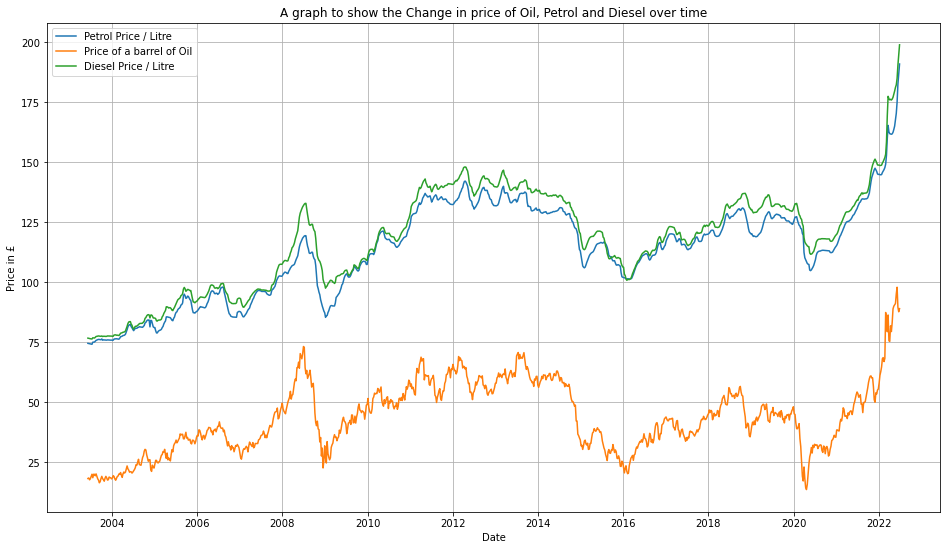

In [106]:
plt.figure(figsize=(16,9))
plt.plot(petrol['Date'], petrol['Petrol(pence/litre)'], label='Petrol Price / Litre')
plt.plot(petrol['Date'], petrol['Barrel_oil_£'], label = 'Price of a barrel of Oil')
plt.plot(diesel['Date'], diesel['Diesel(pence/litre)'], label = 'Diesel Price / Litre')
plt.title('A graph to show the Change in price of Oil, Petrol and Diesel over time')
plt.ylabel('Price in £')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('PriceChanges.jpg')
plt.show()

# Percentage Change Over Time

In [107]:
oil_price.sort_values('Date', ascending=True, inplace=True, ignore_index=True)
oil_price['Percent Change'] = oil_price['Barrel_oil_£'].pct_change() * 100
oil_price

,Date,Barrel_oil_£,Percent Change
0,2002-01-07,13.581168,NaN
1,2002-01-14,12.522600,-7.794381
2,2002-01-21,14.182905,13.258469
3,2002-01-28,14.376052,1.361830
4,2002-02-04,14.315716,-0.419698
...,...,...,...
1064,2022-05-30,95.155435,4.358306
1065,2022-06-06,97.959906,2.947253
1066,2022-06-13,89.609124,-8.524694
1067,2022-06-20,87.742586,-2.082978


In [108]:
petrol_price = petrol[['Date','Petrol(pence/litre)']]
petrol_price.sort_values('Date', ascending=True, inplace = True, ignore_index=True)
petrol_price['Percent Change'] = petrol_price['Petrol(pence/litre)'].pct_change() * 100
petrol_price

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/xg/h5_b_c714jnf6rp29g95jdp80000gn/T/ipykernel_2766/3071527128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrol_price['Percent Change'] = petrol_price['Petrol(pence/litre)'].pct_change() * 100


,Date,Petrol(pence/litre),Percent Change
0,2003-06-09,74.59,NaN
1,2003-06-16,74.47,-0.160879
2,2003-06-23,74.42,-0.067141
3,2003-06-30,74.35,-0.094061
4,2003-07-07,74.28,-0.094149
...,...,...,...
984,2022-05-30,170.36,1.652843
985,2022-06-06,174.99,2.717774
986,2022-06-13,182.53,4.308818
987,2022-06-20,186.85,2.366734


In [109]:
diesel_price = diesel[['Date','Diesel(pence/litre)']]
diesel_price.sort_values('Date', ascending=True, inplace = True, ignore_index=True)
diesel_price['Percent Change'] = diesel_price['Diesel(pence/litre)'].pct_change() * 100
diesel_price

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/var/folders/xg/h5_b_c714jnf6rp29g95jdp80000gn/T/ipykernel_2766/3601697119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel_price['Percent Change'] = diesel_price['Diesel(pence/litre)'].pct_change() * 100


,Date,Diesel(pence/litre),Percent Change
0,2003-06-09,76.77,NaN
1,2003-06-16,76.69,-0.104207
2,2003-06-23,76.62,-0.091277
3,2003-06-30,76.51,-0.143566
4,2003-07-07,76.46,-0.065351
...,...,...,...
984,2022-05-30,182.25,0.601678
985,2022-06-06,184.94,1.475995
986,2022-06-13,190.43,2.968530
987,2022-06-20,194.87,2.331565
